In [1]:
# Importar a biblioteca para análise de dados Pandas e ler o banco de dados IMDB.
import pandas as pd
imdb = pd.read_csv("imdb-reviews-pt-br.csv")
imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
%matplotlib inline

In [3]:
#Quantidade de avaliações positivas e negativas
imdb.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [4]:
#Converter as avaliações em binário
imdb['review_sentiment'] = imdb.sentiment.replace(['neg','pos'],[0,1])
imdb.head()
#imdb.tail()

,id,text_en,text_pt,sentiment,review_sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [5]:
#Importar o algorítimo de treinamento e testes da biblioteca de machine learning sklearn (SciKit-Learn)
#Dividir em dados de treino e dados de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imdb.text_pt, imdb.sentiment, random_state=42)

In [6]:
#Importar o modelo de de machine learn e treinar o modelo
from sklearn.linear_model import LogisticRegression
logistic_regretion = LogisticRegression()
logistic_regretion.fit(X_train, y_train)
acc = logistic_regretion.score(X_test,y_test)
print(acc)

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [7]:
#Importar biblioteca de Processamento de Linguagem Natural
import nltk
# nltk.download()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
reviews_pt = imdb.text_pt

In [9]:
vetorizar = CountVectorizer(max_features=100)
bag_of_words = vetorizar.fit_transform(reviews_pt)
# Após vetorização, gera uma matriz esparça
#bag_of_words_md
#len(vetorizar.get_feature_names())
# Após a vetorização, percebemos que a matriz esparça é muito grande, 
# o que pode comprometer o desempenho devido ao tamanho
#Usamos o parametro max_features, com as palavas que mais aparecem no corpus
bag_of_words.shape

(49459, 100)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, imdb.review_sentiment , random_state=42)
#Importar o modelo de de machine learn e treinar o modelo
from sklearn.linear_model import LogisticRegression
logistic_regretion = LogisticRegression()
logistic_regretion.fit(X_train, y_train)
acc = logistic_regretion.score(X_test,y_test)
print(acc * 100)

71.19288313788921


In [11]:
def classificar_texto(corpus_textual_df, column_text, column_classification):
    vetorizar = CountVectorizer(max_features=100)
    bag_of_words = vetorizar.fit_transform(corpus_textual_df[column_text])
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, corpus_textual_df[column_classification] , random_state=42)
    logistic_regretion = LogisticRegression()
    logistic_regretion.fit(X_train, y_train)
    return logistic_regretion.score(X_test,y_test) * 100

In [12]:
print(classificar_texto(imdb, 'text_pt', 'review_sentiment'))

71.19288313788921


In [ ]:
#Trazer as palavras mais relevantes possíveis, para a lista das 100 mais citadas

In [38]:
#Utilizando world cloud
#pip install wordcloud

In [13]:
from wordcloud import WordCloud
# Vetorizar as palavras do corpus
palavras = ' '.join([palavra for palavra in imdb['text_pt']])
len(palavras)

63448424

In [17]:
nuvem = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(palavras)

In [15]:
import matplotlib.pyplot as plt

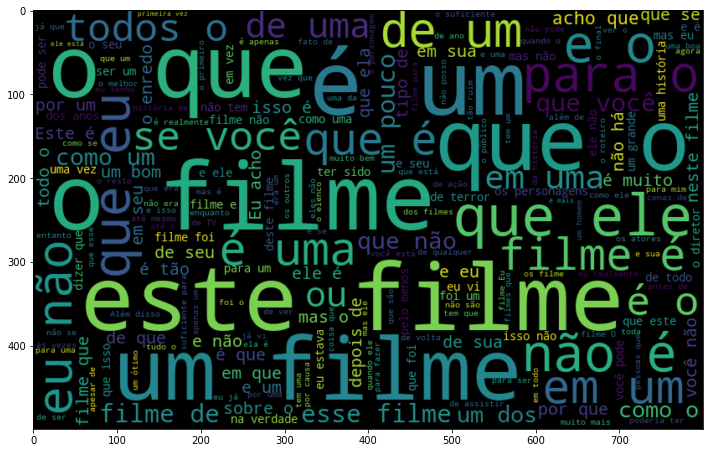

In [18]:
plt.figure(figsize=(12,8))
plt.imshow(nuvem, interpolation='bilinear')
plt.show()

In [19]:
def monta_nuvem(dataFrame, column_name):
    palavras = ' '.join([palavra for palavra in dataFrame[column_name]])
    nuvem = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(palavras)
    plt.figure(figsize=(12,8))
    plt.imshow(nuvem, interpolation='bilinear')
    plt.show()


In [21]:
reviews_negativos = imdb.query('review_sentiment == 0')
reviews_positivos = imdb.query('review_sentiment == 1')

,id,text_en,text_pt,sentiment,review_sentiment
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1


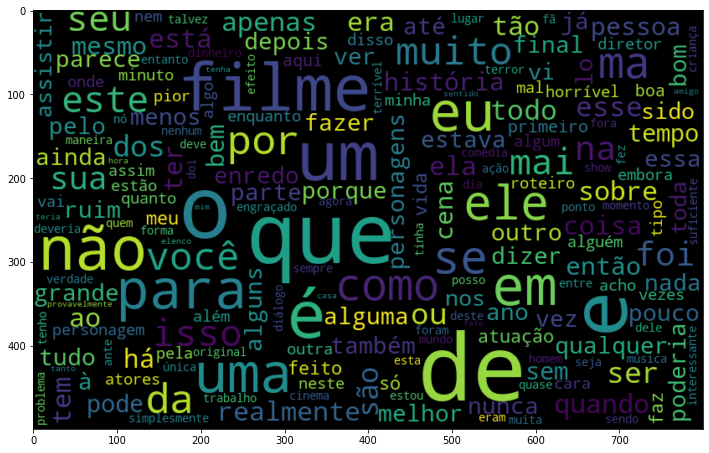

In [22]:
monta_nuvem(reviews_negativos, 'text_pt')

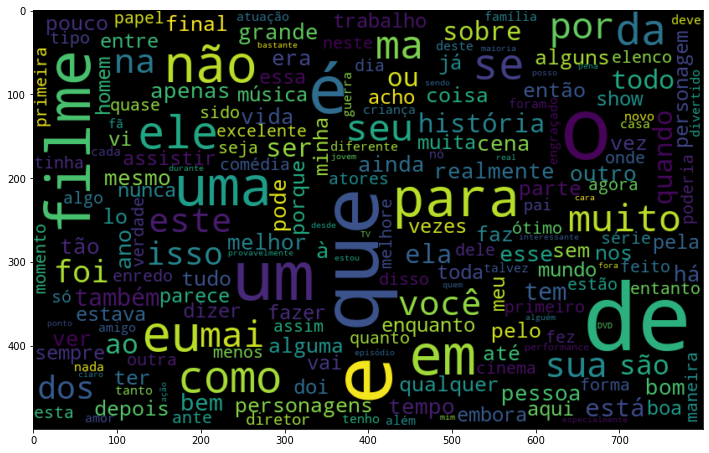

In [23]:
monta_nuvem(reviews_positivos, 'text_pt')

In [27]:
from nltk import tokenize
palavras = ' '.join([palavra for palavra in imdb['text_pt']])
token_whitespace = tokenize.WhitespaceTokenizer()
tokens = token_whitespace.tokenize(palavras) # nltk.word_tokenize(palavras)
tokens

['Mais',
 'uma',
 'vez,',
 'o',
 'Sr.',
 'Costner',
 'arrumou',
 'um',
 'filme',
 'por',
 'muito',
 'mais',
 'tempo',
 'do',
 'que',
 'o',
 'necessário.',
 'Além',
 'das',
 'terríveis',
 'seqüências',
 'de',
 'resgate',
 'no',
 'mar,',
 'das',
 'quais',
 'há',
 'muito',
 'poucas,',
 'eu',
 'simplesmente',
 'não',
 'me',
 'importei',
 'com',
 'nenhum',
 'dos',
 'personagens.',
 'A',
 'maioria',
 'de',
 'nós',
 'tem',
 'fantasmas',
 'no',
 'armário,',
 'e',
 'o',
 'personagem',
 'Costers',
 'é',
 'realizado',
 'logo',
 'no',
 'início,',
 'e',
 'depois',
 'esquecido',
 'até',
 'muito',
 'mais',
 'tarde,',
 'quando',
 'eu',
 'não',
 'me',
 'importava.',
 'O',
 'personagem',
 'com',
 'o',
 'qual',
 'deveríamos',
 'nos',
 'importar',
 'é',
 'muito',
 'arrogante',
 'e',
 'superconfiante,',
 'Ashton',
 'Kutcher.',
 'O',
 'problema',
 'é',
 'que',
 'ele',
 'sai',
 'como',
 'um',
 'garoto',
 'que',
 'pensa',
 'que',
 'é',
 'melhor',
 'do',
 'que',
 'qualquer',
 'outra',
 'pessoa',
 'ao',
 'seu',

In [28]:
freq = nltk.FreqDist(tokens)
freq.most_common(50)

[('de', 417651),
 ('que', 325070),
 ('e', 299743),
 ('o', 244881),
 ('um', 216410),
 ('a', 210179),
 ('é', 192381),
 ('em', 132778),
 ('uma', 130888),
 ('não', 127915),
 ('para', 126556),
 ('filme', 117543),
 ('do', 101737),
 ('com', 99174),
 ('como', 78361),
 ('os', 73766),
 ('se', 72245),
 ('eu', 68814),
 ('mas', 64788),
 ('da', 61901),
 ('por', 61339),
 ('no', 57145),
 ('mais', 53504),
 ('muito', 51761),
 ('Eu', 51485),
 ('você', 48811),
 ('ele', 47442),
 ('O', 44924),
 ('na', 44208),
 ('foi', 42207),
 ('dos', 41222),
 ('seu', 40460),
 ('as', 39292),
 ('sua', 36724),
 ('este', 34632),
 ('são', 34134),
 ('ser', 32696),
 ('ou', 32498),
 ('A', 31547),
 ('isso', 30528),
 ('-', 28767),
 ('sobre', 28626),
 ('está', 28057),
 ('filmes', 27619),
 ('eles', 26264),
 ('ao', 25526),
 ('tem', 24980),
 ('tão', 24790),
 ('realmente', 23673),
 ('era', 23353)]

In [31]:
df_frequencia = pd.DataFrame({'Word':list(freq.keys()), 'Frequency':list(freq.values())})
df_frequencia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348285 entries, 0 to 348284
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Word       348285 non-null  object
 1   Frequency  348285 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ MB


In [33]:
top_10 = df_frequencia.nlargest(columns='Frequency', n=10)
top_10

,Word,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [29]:
import seaborn as sns

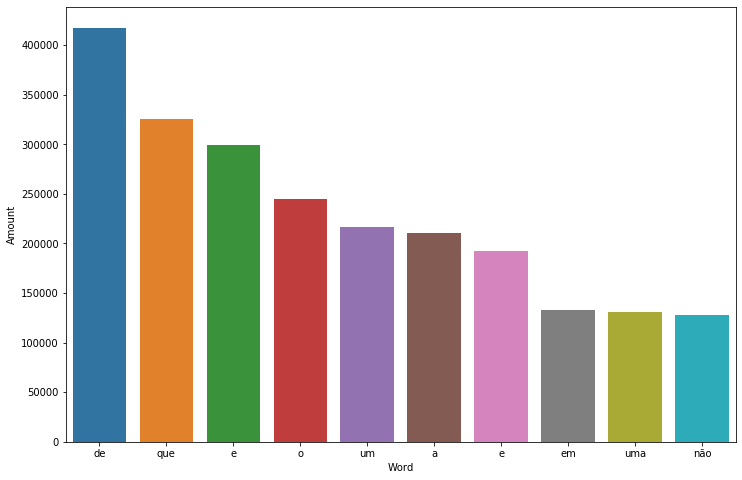

In [34]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_10, x='Word', y='Frequency')
ax.set(ylabel='Amount')
plt.show()

In [52]:
def grafico_barras(df_reviews, column_text, amount):
    words = ' '.join([word for word in df_reviews[column_text]])
    tokens = token_whitespace.tokenize(words) # nltk.word_tokenize(palavras)
    frequency = nltk.FreqDist(tokens)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = amount)
    total = df_frequency['Frequency'].sum()
    df_frequency['Percent'] = df_frequency['Frequency'].cumsum() / total * 100

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency")
    # ax2 = ax.twinx()
    # sns.lineplot(data=df_frequency, x='Word', y='Percent', color='red', sort=False, ax=ax2)
    ax.set(ylabel = "Amount of appearance")
    plt.show()


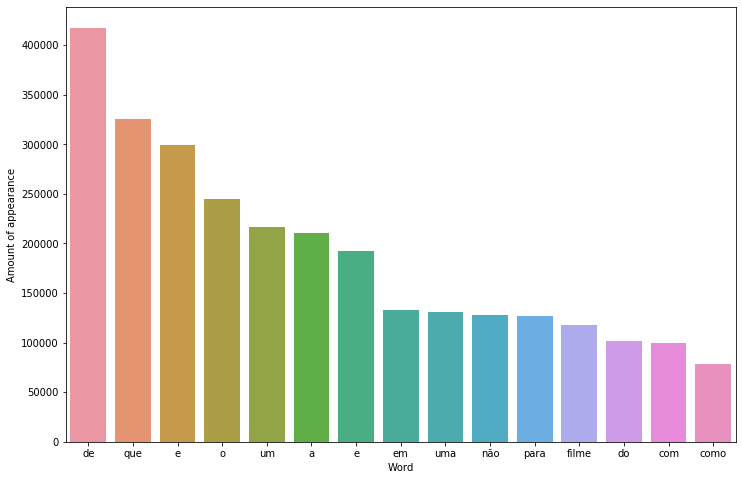

In [53]:
grafico_barras(imdb, 'text_pt', 15)

In [47]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
processed = []
for review in imdb.text_pt:
    new_phrase = []
    text = token_whitespace.tokenize(review)
    for word in text:
        if word not in palavras_irrelevantes:
            new_phrase.append(word)
    processed.append(' '.join(new_phrase))
imdb['treatment_1'] = processed

In [49]:
imdb.head(10)

,id,text_en,text_pt,sentiment,review_sentiment,treatment_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg,0,Uma coisa engraçada aconteceu comigo enquanto ...
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg,0,Este filme terror alemão ser estranhos vi. Eu ...
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg,0,"Sendo fã longa data cinema japonês, esperava i..."
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg,0,"""Tokyo Eyes"" fala menina japonesa 17 anos cai ..."
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg,0,Fazendeiros ricos Buenos Aires têm longa polít...


In [50]:
print(classificar_texto(imdb, 'treatment_1', 'review_sentiment'))

71.48402749696726


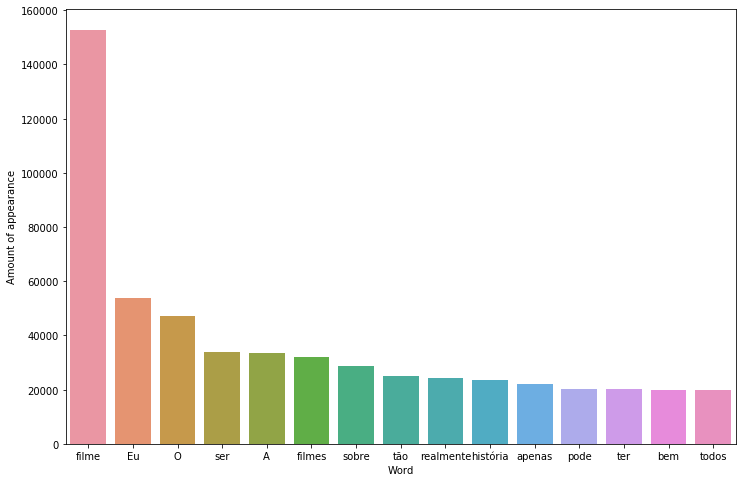

In [87]:
grafico_barras(imdb, 'treatment_1', 15)

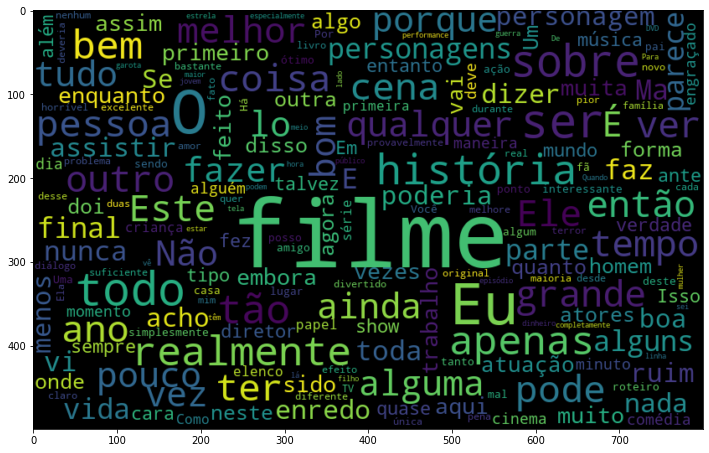

In [78]:
monta_nuvem(imdb,'treatment_1')

In [61]:
from string import punctuation
punct = [punct for punct in punctuation]
punct

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [62]:
palavras_irrelevantes += punct
palavras_irrelevantes

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [94]:
token_punkt = tokenize.WordPunctTokenizer()
processed = []
for review in imdb.text_pt:
    new_phrase = []
    text = token_punkt.tokenize(review)
    normalizada = [word.lower() for word in text if word.isalpha()]
    for word in normalizada:
        if (word not in palavras_irrelevantes):
            new_phrase.append(word)
    processed.append(' '.join(new_phrase))
imdb['treatment_1'] = processed

In [95]:
imdb['treatment_1'].head()

0    vez sr costner arrumou filme tempo necessário ...
1    exemplo motivo maioria filmes ação mesmos gené...
2    primeiro tudo odeio raps imbecis poderiam agir...
3    beatles puderam escrever músicas todos gostass...
4    filmes fotos latão palavra apropriada verdade ...
Name: treatment_1, dtype: object

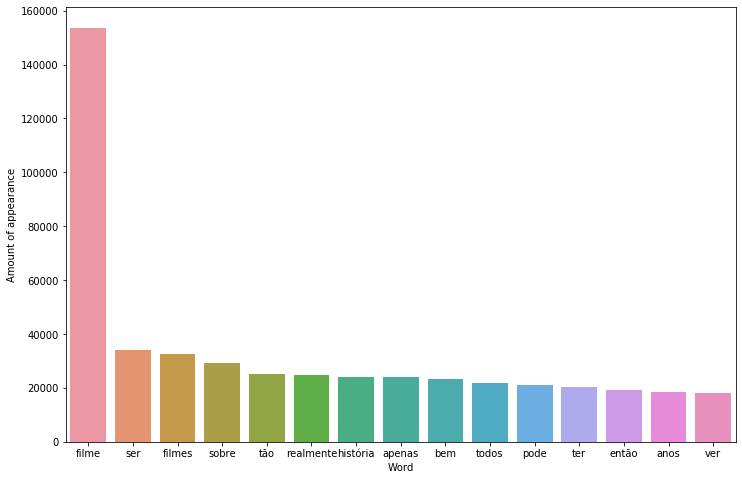

In [96]:
grafico_barras(imdb, 'treatment_1', 15)

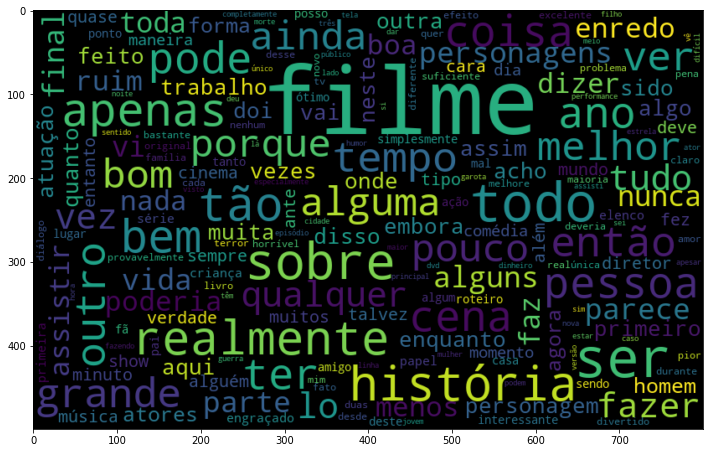

In [97]:
monta_nuvem(imdb, 'treatment_1')

In [98]:
classificar_texto(imdb,'treatment_1','review_sentiment')

71.5002021835827

In [99]:
reviews_negativos = imdb.query('review_sentiment == 0')
reviews_positivos = imdb.query('review_sentiment == 1')

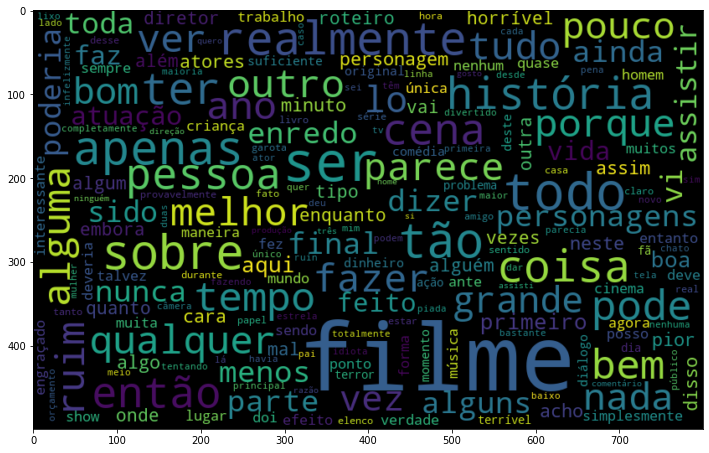

In [100]:
monta_nuvem(reviews_negativos, 'treatment_1')

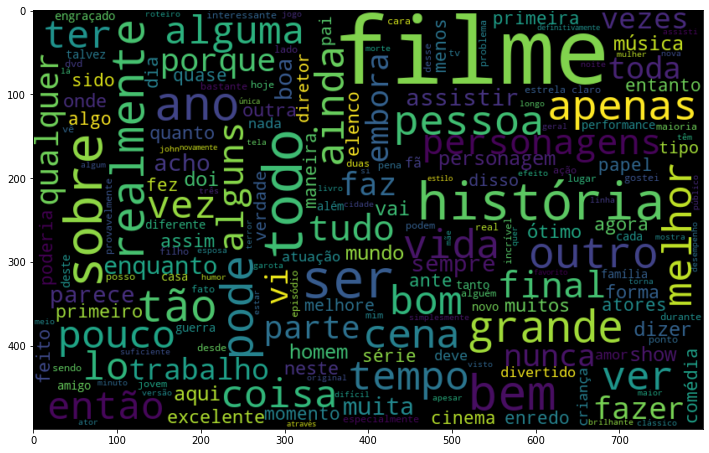

In [101]:
monta_nuvem(reviews_positivos, 'treatment_1')